In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("Classified Data", index_col= 0)

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop("TARGET CLASS", axis = 1))

In [8]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [10]:
df_features = pd.DataFrame(data = scaled_features, columns = df.columns[:-1])

In [11]:
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [12]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WTT     1000 non-null   float64
 1   PTI     1000 non-null   float64
 2   EQW     1000 non-null   float64
 3   SBI     1000 non-null   float64
 4   LQE     1000 non-null   float64
 5   QWG     1000 non-null   float64
 6   FDJ     1000 non-null   float64
 7   PJF     1000 non-null   float64
 8   HQE     1000 non-null   float64
 9   NXJ     1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df_features
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .3, random_state= 101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
predictions = knn.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[309  30]
 [ 41 320]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       339
           1       0.91      0.89      0.90       361

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700



In [21]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

Text(0, 0.5, 'Error Rate')

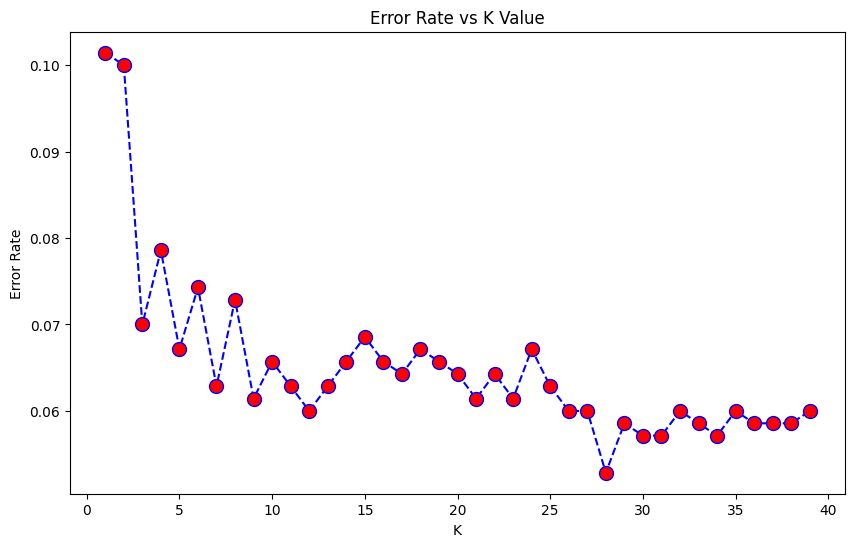

In [24]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = '--', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
knn = KNeighborsClassifier(n_neighbors= 17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

[[315  24]
 [ 21 340]]

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       339
           1       0.93      0.94      0.94       361

    accuracy                           0.94       700
   macro avg       0.94      0.94      0.94       700
weighted avg       0.94      0.94      0.94       700

